# Coding Exercise Part 2: NN from Scratch in PyTorch

### Objective
* Code a "vanilla" feedforward neural network from the scratch in PyTorch.

In [1]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Fix random seed: https://pytorch.org/docs/stable/notes/randomness.html
torch.manual_seed(12)

### 2. Implement Neural Network class

In this exercise, you will implement a simple feed-forward neural network using PyTorch for binary classification tasks.

**Objectives:** 
* Implement the initialization method for the neural network.
* Implement the forward propagation step.
* Implement the training loop, including the forward pass, loss computation, and parameter updates.

**Background:**

**Feed-forward Neural Network:** This is a type of artificial neural network where the connections between the nodes do not form a cycle. In this exercise, the neural network will have an input layer, one hidden layer, and an output layer.



In [ ]:
# Define the Neural Network using PyTorch
class PyTorchNeuralNetwork(nn.Module):
    # Init
    def __init__(self, input_size, hidden_size, output_size):
        super(PyTorchNeuralNetwork, self).__init__()
        """
        Initialize the neural network with the given sizes.

        Args:
        - input_size: Integer, the number of input features.
        - hidden_size: Integer, the number of neurons in the hidden layer.
        - output_size: Integer, the number of neurons in the output layer (usually 1 for binary classification).
        """

        # First fully connected layer (input to hidden)
        self.fc1 = nn.Linear(input_size, hidden_size)

        # Second fully connected layer (hidden to output)
        self.fc2 = nn.Linear(hidden_size, output_size)

        # Sigmoid activation function for the output layer
        self.sigmoid = nn.Sigmoid()

    # Perform forward propagation step
    def forward(self, x):
        """
        Perform the forward propagation step.

        Args:
        - x: A PyTorch tensor of shape (batch_size, input_size).

        Returns:
        - x: A PyTorch tensor of shape (batch_size, output_size) representing the model's predictions.
        """
        
        # Apply ReLU activation after first layer
        x = torch.relu(self.fc1(x))

        # Apply Sigmoid activation after second layer
        x = self.sigmoid(self.fc2(x))

        return x

    # Trains the neural network using the specified data (X_train) and labels (Y_train)
    def train(self, X_train, Y_train, learning_rate=0.01, epochs=5000):
        """
        Train the neural network using the provided training data.

        Args:
        - X_train: A PyTorch tensor of shape (n_samples, input_size) containing the training data.
        - Y_train: A PyTorch tensor of shape (n_samples, output_size) containing the true labels.
        - learning_rate: Learning rate for the optimizer.
        - epochs: Number of epochs to train the model.
        """
        
        # Use Binary Cross Entropy Loss for binary classification
        criterion = nn.BCELoss()

        # Use the Adam optimizer for parameter updates
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        # List to store loss values for each epoch
        self.losses = []

        # Training loop
        for epoch in range(epochs):
            # Forward pass: Compute predicted y by passing x to the model
            outputs = self.forward(X_train)

            # Compute the loss
            loss = criterion(outputs, Y_train)

            # Zero gradients, backward pass, optimizer step
            optimizer.zero_grad()  # Zero out any cached gradients
            loss.backward()        # Compute gradient of the loss with respect to model parameters
            optimizer.step()       # Update model parameters

            # Store the loss value
            self.losses.append(loss.item())

            # Print the loss every 100 epochs
            if (epoch+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    def predict(self, X):
        """
        Predicts the outputs for the given inputs X.
        """
        with torch.no_grad():  # No need to compute gradients during prediction
            outputs = self.forward(X)
            return (outputs > 0.5).int() # Convert probabilities to binary outputs

    def plot_loss(self):
        # Plotting the loss curve
        plt.plot(self.losses)
        plt.xlabel("Epoch")
        plt.ylabel("Loss (BCE)")
        plt.title("Loss curve")
        plt.show()

### 3. Load dataset
We will work with the Haberman’s Survival Dataset. The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. There are 306 items (patients). There are three predictor variables (age, year of operation, number of detected nodes). The variable to predict is encoded as 0 (survived) or 1 (died). See [
Haberman's Survival Dataset](https://archive.ics.uci.edu/dataset/43/haberman+s+survival).

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/emmanueliarussi/DU-DeepLearning/main/week_2/haberman_data/haberman.data'
headers =  ['age', 'year','nodes','y']
haberman_df  = pd.read_csv(url, sep=',', names=headers)

In [4]:
haberman_df

,age,year,nodes,y
0,age,year,nodes,y
1,30,64,1,0
2,30,62,3,0
3,30,65,0,0
4,31,59,2,0
...,...,...,...,...
302,75,62,1,0
303,76,67,0,0
304,77,65,3,0
305,78,65,1,1


In [5]:
# Convert pandas dataframe into numpy arrays
x       = haberman_df.drop(columns=['y']).values[1:]
y_label = haberman_df['y'].values[1:].reshape(x.shape[0], 1).astype(float)

In [6]:
# Split data into train and test set
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y_label, test_size=0.2, random_state=2)

In [7]:
# Standardize the dataset
# Standardize features by removing the mean and scaling to unit variance.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing   import StandardScaler

sc = StandardScaler()
sc.fit(xtrain)
xtrain = sc.transform(xtrain)
xtest  = sc.transform(xtest)

print("Shape of train set is {}".format(xtrain.shape))
print("Shape of test set is {}".format(xtest.shape))
print("Shape of train label is {}".format(ytrain.shape))
print("Shape of test labels is {}".format(ytest.shape))

Shape of train set is (244, 3)
Shape of test set is (62, 3)
Shape of train label is (244, 1)
Shape of test labels is (62, 1)


In [8]:
# Convert numpy arrays to PyTorch tensors
X_train = torch.FloatTensor(xtrain)
Y_train = torch.FloatTensor(ytrain)
X_test = torch.FloatTensor(xtest)
Y_test = torch.FloatTensor(ytest)

Epoch [100/5000], Loss: 0.5682
Epoch [200/5000], Loss: 0.5531
Epoch [300/5000], Loss: 0.5424
Epoch [400/5000], Loss: 0.5343
Epoch [500/5000], Loss: 0.5279
Epoch [600/5000], Loss: 0.5229
Epoch [700/5000], Loss: 0.5189
Epoch [800/5000], Loss: 0.5154
Epoch [900/5000], Loss: 0.5124
Epoch [1000/5000], Loss: 0.5098
Epoch [1100/5000], Loss: 0.5077
Epoch [1200/5000], Loss: 0.5058
Epoch [1300/5000], Loss: 0.5040
Epoch [1400/5000], Loss: 0.5025
Epoch [1500/5000], Loss: 0.5012
Epoch [1600/5000], Loss: 0.5001
Epoch [1700/5000], Loss: 0.4991
Epoch [1800/5000], Loss: 0.4982
Epoch [1900/5000], Loss: 0.4974
Epoch [2000/5000], Loss: 0.4967
Epoch [2100/5000], Loss: 0.4960
Epoch [2200/5000], Loss: 0.4954
Epoch [2300/5000], Loss: 0.4948
Epoch [2400/5000], Loss: 0.4942
Epoch [2500/5000], Loss: 0.4937
Epoch [2600/5000], Loss: 0.4933
Epoch [2700/5000], Loss: 0.4929
Epoch [2800/5000], Loss: 0.4925
Epoch [2900/5000], Loss: 0.4921
Epoch [3000/5000], Loss: 0.4918
Epoch [3100/5000], Loss: 0.4914
Epoch [3200/5000]

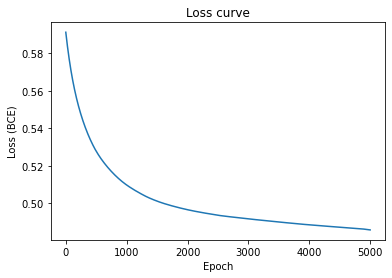

In [9]:
# Initialize the model
model = PyTorchNeuralNetwork(input_size=3, hidden_size=5, output_size=1)

# Train the model
model.train(X_train, Y_train, epochs=5000, learning_rate=0.01)

# Plot the loss curve
model.plot_loss()

In [10]:
def accuracy(y, y_hat):
    # Computes the accuracy between the predicted labels and the truth labels
    acc = sum(y == y_hat) / len(y)  # fraction of predictions our model got right
    return acc[0]

In [11]:
# Evaluate the model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Train accuracy is {0:.2f}".format(accuracy(Y_train, train_pred)))
print("Test accuracy is {0:.2f}".format(accuracy(Y_test, test_pred)))

Train accuracy is 0.77
Test accuracy is 0.69


### 4. Visualizing Computation Graph

In [12]:
# Repository: https://github.com/szagoruyko/pytorchviz
!pip install torchviz

import torchviz
from torchviz import make_dot

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.1 MB/s eta 0:00:001.8 MB/s eta 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=5fa3f01cbc6969a042808a0c2dfd431d7184b577dac1f10ac5649af82e3c54a8
  Stored in directory: /home/emma/.cache/pip/wheels/27/01/9a/eda4eb8c3d5ea66e652137ad7feb65759a98f4b8bcd128a96b
Successfully built torchviz


In [ ]:
# Create a dummy input that matches the dimensionality of the input
dummy_input = torch.FloatTensor(1,3)

# Pass the dummy input through the model to get the output
output = model(dummy_input)

# Visualize the computation graph
make_dot(output, params=dict(model.named_parameters()))

See more in this [PyTorchViz Gallery](https://colab.research.google.com/github/szagoruyko/pytorchviz/blob/master/examples.ipynb).